# Run SurvTRACE on METABRIC dataset

In [1]:
import pdb
from collections import defaultdict
import matplotlib.pyplot as plt

from survtrace.dataset import load_data
from survtrace.evaluate_utils import Evaluator
from survtrace.utils import set_random_seed
from survtrace.model import SurvTraceSingle
from survtrace.train_utils import Trainer
from survtrace.config import STConfig

# define the setup parameters
STConfig['data'] = 'metabric'

set_random_seed(STConfig['seed'])

hparams = {
    'batch_size': 64,
    'weight_decay': 1e-4,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [2]:
# load data
df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = load_data(STConfig)

# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit((df_train, df_y_train), (df_val, df_y_val),
        batch_size=hparams['batch_size'],
        epochs=hparams['epochs'],
        learning_rate=hparams['learning_rate'],
        weight_decay=hparams['weight_decay'],)

D:\UIUC_AI_Health\SurvTRACE\survtrace\utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


use pytorch-cuda for training.


D:\UIUC_AI_Health\SurvTRACE\survtrace\train_utils.py:195: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:1025.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


[Train-0]: 31.35417079925537
[Val-0]: 1.3768609762191772
[Train-1]: 24.999290466308594
[Val-1]: 1.125670075416565
[Train-2]: 21.92027109861374
[Val-2]: 1.1176223754882812
[Train-3]: 21.552372932434082
[Val-3]: 1.0617270469665527
[Train-4]: 21.48322820663452
[Val-4]: 1.0303016901016235
[Train-5]: 21.309285163879395
[Val-5]: 1.031329870223999
EarlyStopping counter: 1 out of 5
[Train-6]: 21.411774814128876
[Val-6]: 1.0380909442901611
EarlyStopping counter: 2 out of 5
[Train-7]: 21.323206841945648
[Val-7]: 1.0362335443496704
EarlyStopping counter: 3 out of 5
[Train-8]: 21.290917992591858
[Val-8]: 1.0184327363967896
[Train-9]: 21.13839763402939
[Val-9]: 1.0406811237335205
EarlyStopping counter: 1 out of 5
[Train-10]: 21.206656575202942
[Val-10]: 1.0603537559509277
EarlyStopping counter: 2 out of 5
[Train-11]: 21.30414569377899
[Val-11]: 1.030419111251831
EarlyStopping counter: 3 out of 5
[Train-12]: 21.165355145931244
[Val-12]: 1.027835726737976
EarlyStopping counter: 4 out of 5
[Train-13]:

In [3]:
# evaluate model
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

For 0.25 quantile,
TD Concordance Index - IPCW: 0.7349585253058486
Brier Score: 0.10674401281864801
For 0.5 quantile,
TD Concordance Index - IPCW: 0.7063757169608801
Brier Score: 0.1760769913342983
For 0.75 quantile,
TD Concordance Index - IPCW: 0.686838584785164
Brier Score: 0.2118244778060817
done


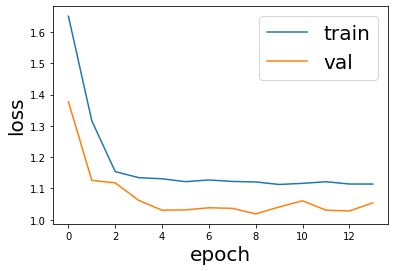

In [9]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()